# Movies Data Analysis

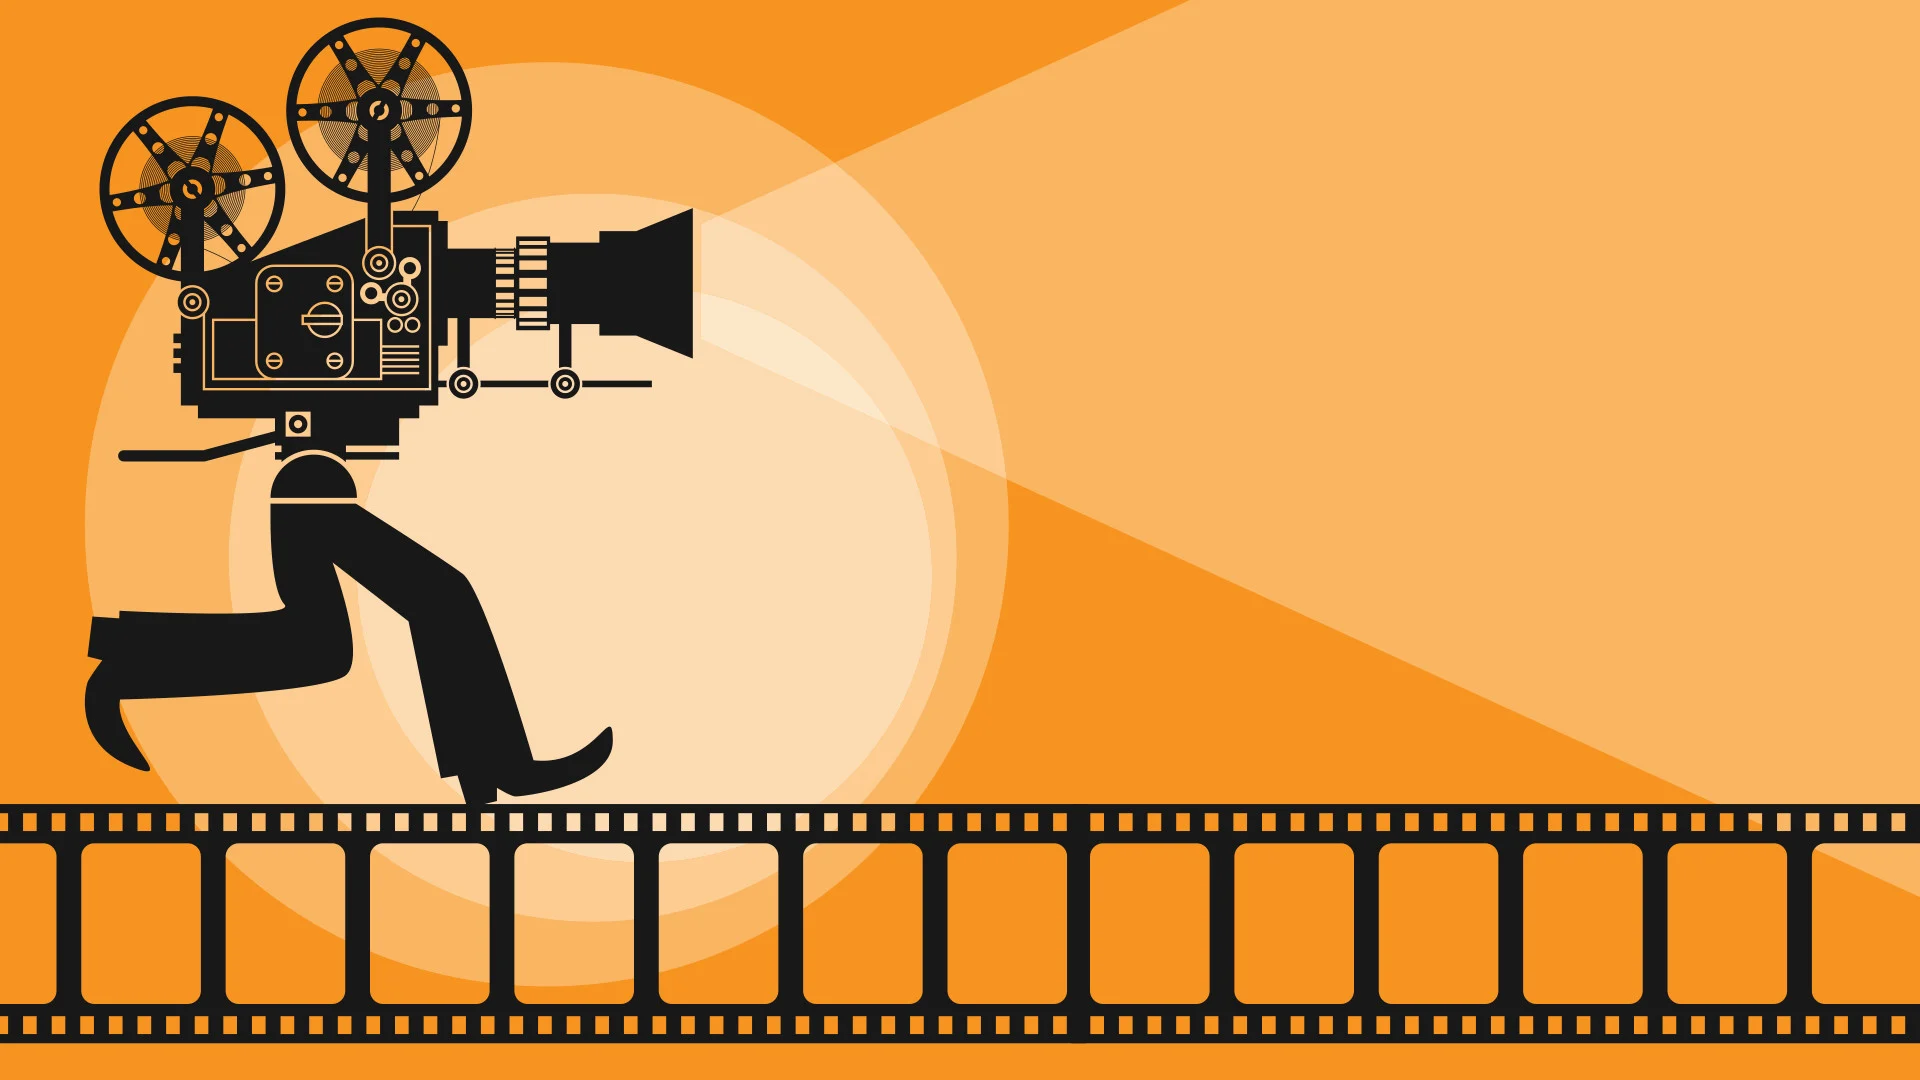

## Overview

Microsoft wishes to launch a new movie studio but are not sure where to start. We will use exploratory data analysis
to draw actionable insights that might give Microsoft an edge in the movie industry.

## Business Problem

Microsoft are clueless about movie production and they want to create a new movie studio.

For the new movie studio to be profitable, some of the factors Microsoft needs to be aware of are:

- **Length of the movies.** How long should the movies be?
- **Genres.** What genres are most common and profitable?
- **Release period.** What is the ideal period for them to release movies and be profitable?

# Importing libraries

In [1]:
#importing the required libraries
import pandas as pd 
import numpy as np

# Reading the data

In this analysis, we will be using datasets from 4 different sources:
 
 - Box Office Mojo
 - IMDB
 - The Numbers
 - TheMovieDB

In [2]:
title_basics_df = pd.read_csv('./data/title.basics.csv')
name_basics_df = pd.read_csv('./data/name.basics.csv')
budget_df = pd.read_csv('./data/tn.movie_budgets.csv')
crew_df = pd.read_csv('./data/title.crew.csv')
gross_df = pd.read_csv('./data/bom.movie_gross.csv')
ratings_df = pd.read_csv('./data/title.ratings.csv')
principals_df = pd.read_csv('./data/title.principals.csv')
tmdb_df = pd.read_csv('./data/tmdb.movies.csv')

## Inspecting the dataframes

After reading into our data, we should then try to understand the structure of our data by inspecting its:

- Shape
- Volume
- Feature types
- Missing Values

In [3]:
title_basics_df.info()
title_basics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
name_basics_df.info()
name_basics_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
budget_df.info()
budget_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
crew_df.info()
crew_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [7]:
gross_df.info()
gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
ratings_df.info()
ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
principals_df.info()
principals_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [10]:
tmdb_df.info()
tmdb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Preparation of the data

### Data Cleaning

In [11]:
# Organize the imdb data for runtime analysis. Extracts columns needed to merge and the runtime data.
tbasics_df = title_basics_df[['primary_title', 'start_year', 'runtime_minutes']]

# Filter out movies that have not been produce and those wthout runtime entries.
tbasics_df = tbasics_df[tbasics_df['start_year'] < 2022]
tbasics_df = tbasics_df.dropna(axis=0, subset=['runtime_minutes'])
tbasics_df.head()

,primary_title,start_year,runtime_minutes
0,Sunghursh,2013,175.0
1,One Day Before the Rainy Season,2019,114.0
2,The Other Side of the Wind,2018,122.0
4,The Wandering Soap Opera,2017,80.0
5,A Thin Life,2018,75.0


In [12]:
# Change the year data to match the IMDB format of only the year number using .to_datetime().
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])
budget_df['release_year'] = budget_df['release_date'].dt.year
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_year'] = tmdb_df['release_date'].dt.year

# Create a month datetime column of the release dates sing .to_datetime().
budget_df['month_dt'] = pd.to_datetime(budget_df['release_date']).dt.month

# Create a month string column of the release dates
budget_df['month'] = budget_df['release_date'].dt.month
budget_df = budget_df.drop('release_date', 1)

In [13]:
# Converting the columns specified below to integer data types.
cols = ['production_budget', 'domestic_gross', 'worldwide_gross']
budget_df[cols] = budget_df[cols].replace('[\$,]', '', regex=True).astype('int64')
budget_df.head()

,id,movie,production_budget,domestic_gross,worldwide_gross,release_year,month_dt,month
0,1,Avatar,425000000,760507625,2776345279,2009,12,12
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5,5
2,3,Dark Phoenix,350000000,42762350,149762350,2019,6,6
3,4,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,5
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,12


In [14]:
# Converting all title data to strings and title case it.
budget_df['movie'] = budget_df['movie'].str.title()
gross_df['title'] = gross_df['title'].str.title()
tbasics_df['primary_title'] = tbasics_df['primary_title'].str.title()
tmdb_df['title'] = tmdb_df['title'].str.title()

In [15]:
# Creating profit margin columns
budget_df['dom_profit_margin'] = (budget_df['domestic_gross'] - budget_df['production_budget']) / budget_df['domestic_gross'] * 100 
budget_df['ww_profit_margin'] = (budget_df['worldwide_gross'] - budget_df['production_budget']) / budget_df['worldwide_gross'] * 100

In [16]:
#Add a column 'worldwide_profit' which is the difference between 'worldwide_gross' and 'production_budget'
budget_df['worldwide_profit'] = (budget_df['worldwide_gross'] - budget_df['production_budget'])

# Use the newly created column above to calculate ROI in percentage form 
budget_df['ROI'] = (budget_df['worldwide_profit']  / budget_df['production_budget']) * 100

In [17]:
# limit the budget_df to movies released after 2000
budget_df = budget_df[budget_df['release_year'] > 2000]

In [18]:
# Creating a new data frame grouped by months and their median values.
month_df = budget_df.groupby('month').median()

month_df = month_df.reset_index()

month_df = month_df.sort_values('month_dt')

month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

month_df['month_name'] = month_dict.values() 

## Merging the datasets

We are going to start by merging the budget and title_basics dataframes

In [19]:
# Merge the datasets on title and year.
budget_and_tbasics = budget_df.merge(tbasics_df,left_on=['movie', 'release_year'],right_on=['primary_title', 'start_year'],how='inner')
budget_and_tbasics = budget_and_tbasics.loc[budget_and_tbasics['domestic_gross'] > 0]

In [20]:
# Creating a new dataframe with studio and box office data 
studios_df = gross_df[['title', 'studio', 'year']].merge(budget_df, left_on=['title', 'year'], right_on=['movie', 'release_year'])

In [21]:
# Group the data in studios_df by studio
avg_studio = studios_df.groupby('studio').mean().reset_index()
avg_studio = avg_studio[avg_studio['dom_profit_margin'] > 0]

   ## Analysis

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context('poster')
sns.set_style('darkgrid')

   ### Runtime Distribution

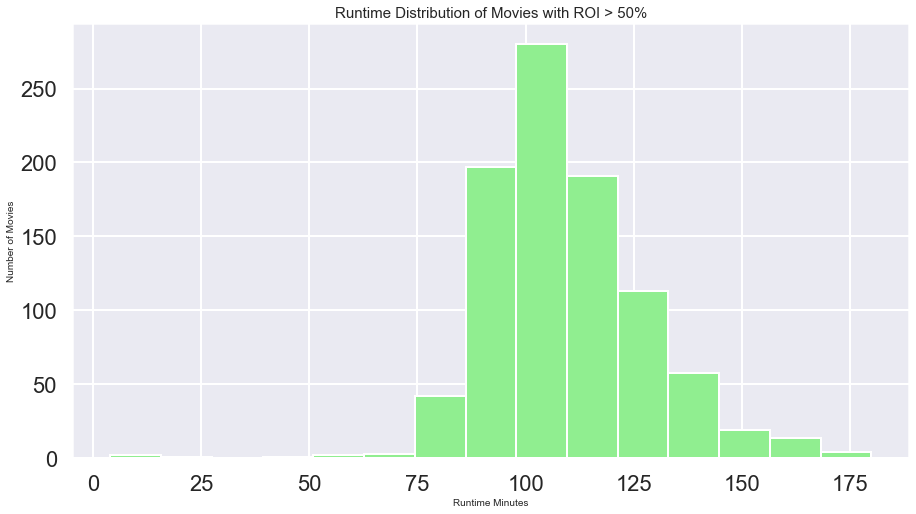

In [23]:
fig, ax = plt.subplots(figsize=(15,8))


ax.hist(budget_and_tbasics['runtime_minutes'].loc[(budget_and_tbasics['runtime_minutes'] < 250) & (budget_and_tbasics['ROI'] > 50)], bins=15, color='lightgreen')

ax.tick_params(axis="x")
ax.set_xlabel("Runtime Minutes", fontsize=10)
ax.set_ylabel("Number of Movies", fontsize=10)
ax.set_title("Runtime Distribution of Movies with ROI > 50%", fontsize=15);

plt.savefig('./images/Runtime Distribution of Movies with ROI.png', dpi = 150)

The histogram shows that movies with runtimes of approximately 90 to 120 minutes had the highest ROI's with the peak at approximately 100 minutes.

   ### Top grossing studios

<ipython-input-25-4d09bc916df8>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(labels=avg_studio['studio'], fontsize=30)
<ipython-input-25-4d09bc916df8>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(labels=avg_studio['studio'], fontsize=30);


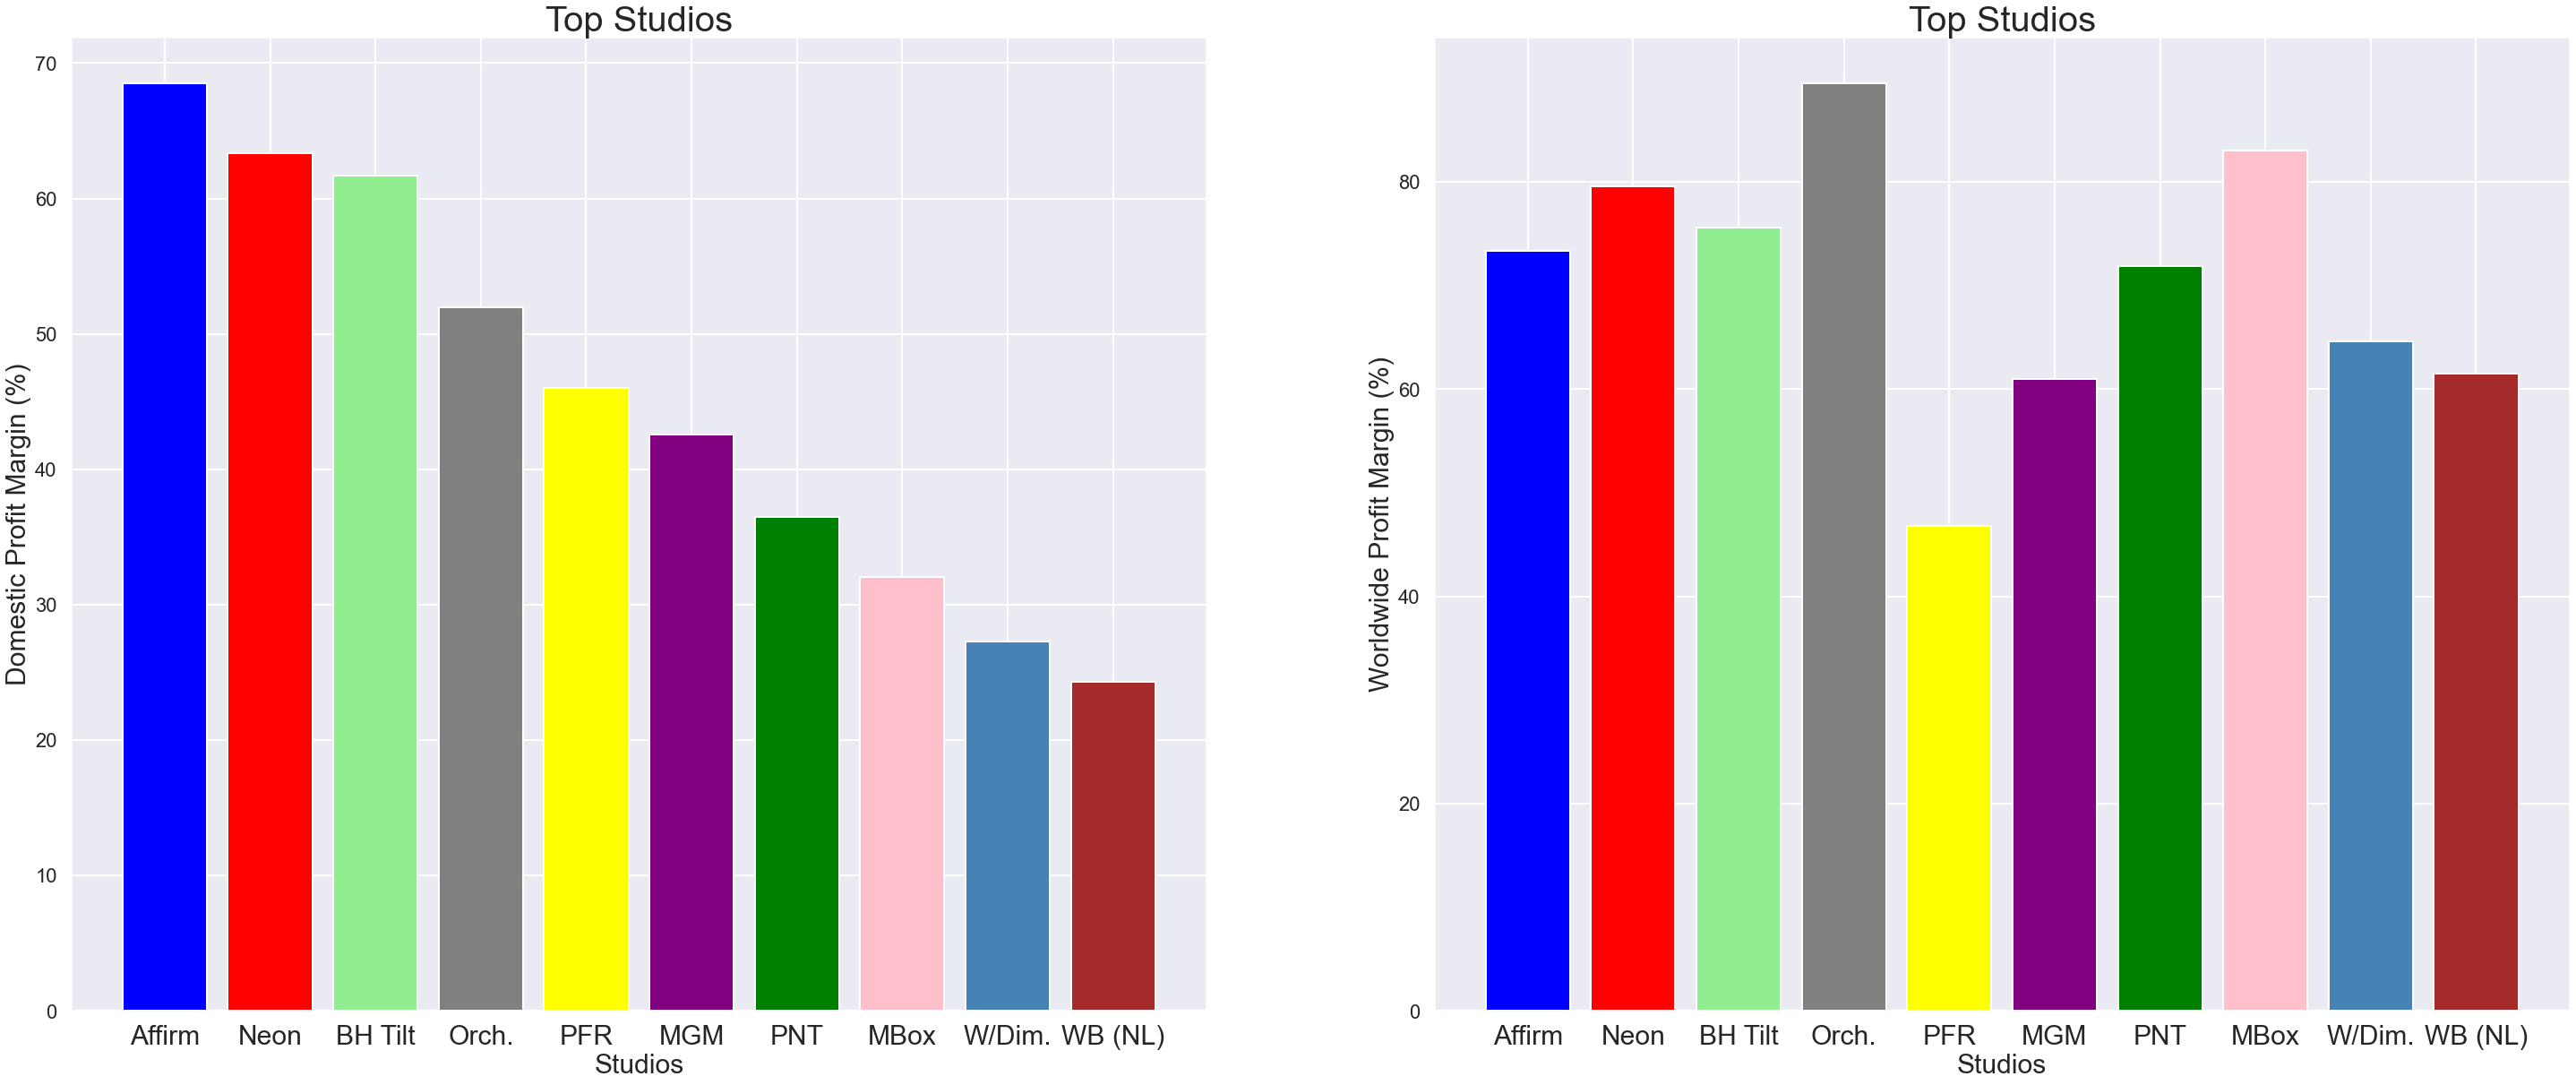

In [25]:
avg_studio = avg_studio.sort_values('dom_profit_margin', ascending=False).iloc[:10]

fig, axs= plt.subplots(figsize=(50,20), ncols=2)

axs[0].bar(avg_studio['studio'], avg_studio['dom_profit_margin'],
          color=['blue', 'red', 'lightgreen', 'grey', 'yellow', 'purple', 'green', 'pink', 'steelblue', 'brown'])
axs[1].bar(avg_studio['studio'], avg_studio['ww_profit_margin'],
          color=['blue', 'red', 'lightgreen', 'grey', 'yellow', 'purple', 'green', 'pink', 'steelblue', 'brown'])

axs[0].set_title('Top Studios', fontsize=40)
axs[0].set_xlabel('Studios', fontsize=30)
axs[0].set_ylabel('Domestic Profit Margin (%)', fontsize=30)
axs[0].set_xticklabels(labels=avg_studio['studio'], fontsize=30)

axs[1].set_title('Top Studios', fontsize=40)
axs[1].set_xlabel('Studios', fontsize=30)
axs[1].set_ylabel('Worldwide Profit Margin (%)', fontsize=30)
axs[1].set_xticklabels(labels=avg_studio['studio'], fontsize=30);

plt.savefig('./images/Top 10 Grossing Studios.png', dpi = 150)

From the plot above, Affirm studio was the top earner domestically,however, it ranked fifth in the top grossing studios globally. This shows a difference in the top grossing studios with reference to domestic and worlwide profit margins. Movie studios that performed well domestically did really mean that they would be top earners globally.

   ### Average Profit & ROI By Release Month

In [26]:
# Graphing Parameters
month = month_df['month_name']
profit_amount = month_df['worldwide_profit']
ROI = month_df['ROI']
wwgross = month_df['worldwide_gross']

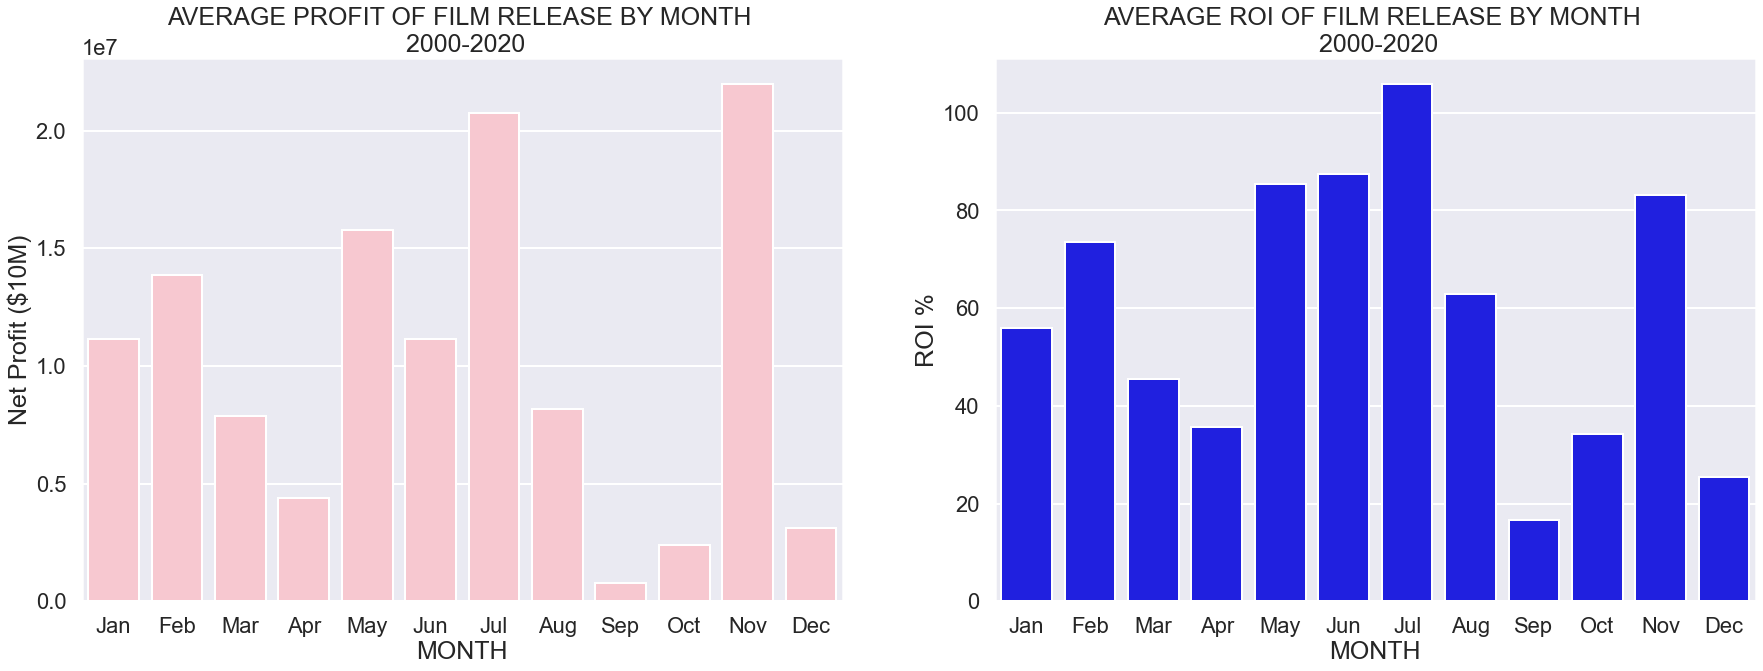

In [27]:
fig, axs = plt.subplots(figsize=(30,10), ncols=2)

sns.barplot(x=month, y=profit_amount, ax=axs[0], color='pink')
sns.barplot(x=month, y=ROI, ax=axs[1], color='blue')
sns.set_context('poster')

axs[0].set_xlabel('MONTH', fontsize=25)
axs[0].set_ylabel('Net Profit ($10M)', fontsize=25)
axs[0].set_title(label='AVERAGE PROFIT OF FILM RELEASE BY MONTH \n 2000-2020', fontsize=25)

axs[1].set_xlabel('MONTH', fontsize=25)
axs[1].set_ylabel('ROI %', fontsize=25)
axs[1].set_title(label='AVERAGE ROI OF FILM RELEASE BY MONTH \n 2000-2020', fontsize=25);

plt.savefig('./images/Average ROI of film release by month.png', dpi = 150)

Movies released in the months of May, June, July and November had the highest ROI's compared to other months with September, October and December having the lowest ROI's.

### Distribution Of Movie Genres

Text(0.5, 1.0, 'Bar Chart - Number of Titles by IMDb genres')

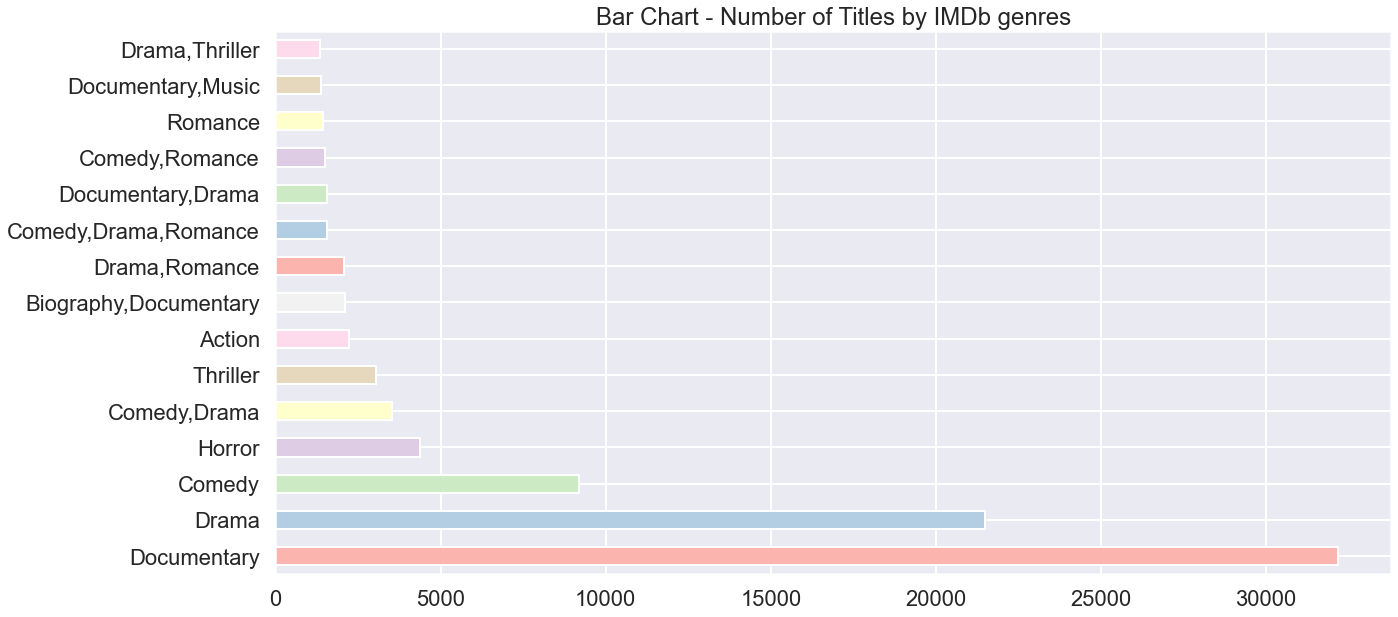

In [28]:
# Distribution of the movie genres (Bar chart)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

ax = title_basics_df['genres'].value_counts().head(15).plot(kind='barh', figsize=(20,10), color=colors)

plt.title('Bar Chart - Number of Titles by IMDb genres')

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
temp = title_basics_df.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)

array(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'game-show',
       'history', 'horror', 'music', 'musical', 'mystery', 'news',
       'reality-tv', 'romance', 'sci-fi', 'short', 'sport', 'talk-show',
       'thriller', 'war', 'western'], dtype='<U11')

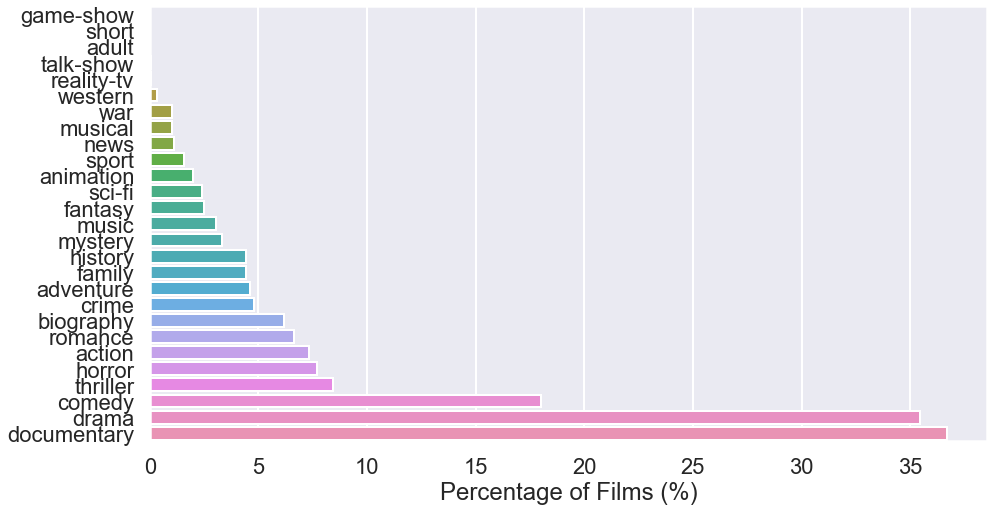

<Figure size 432x288 with 0 Axes>

In [32]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values()/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

plt.savefig('./images/Distribution of Film Genres.png', dpi = 150)

The figure above shows the distribution of unique genres in the dataset. The most common genre was documentary covering over 35% of the films followed by drama and comedy.

,id,production_budget,domestic_gross,worldwide_gross,release_year,month_dt,month,dom_profit_margin,ww_profit_margin,worldwide_profit,ROI,start_year,runtime_minutes
id,1.000000,-0.072983,-0.032885,-0.048178,0.033294,-0.016619,-0.016619,0.024460,-0.003780,-0.037175,0.040505,0.033294,0.010941
production_budget,-0.072983,1.000000,0.702408,0.779926,0.053560,-0.055995,-0.055995,0.034362,0.089487,0.654133,-0.057618,0.053560,0.321808
domestic_gross,-0.032885,0.702408,1.000000,0.943300,0.082538,-0.050361,-0.050361,0.043367,0.092811,0.937407,0.089852,0.082538,0.268229
worldwide_gross,-0.048178,0.779926,0.943300,1.000000,0.089111,-0.035112,-0.035112,0.038388,0.083639,0.983572,0.075335,0.089111,0.285588
release_year,0.033294,0.053560,0.082538,0.089111,1.000000,-0.064014,-0.064014,0.005516,0.005398,0.092245,0.033242,1.000000,0.083613
month_dt,-0.016619,-0.055995,-0.050361,-0.035112,-0.064014,1.000000,1.000000,-0.034604,-0.035119,-0.026284,-0.010653,-0.064014,0.137547
month,-0.016619,-0.055995,-0.050361,-0.035112,-0.064014,1.000000,1.000000,-0.034604,-0.035119,-0.026284,-0.010653,-0.064014,0.137547
dom_profit_margin,0.024460,0.034362,0.043367,0.038388,0.005516,-0.034604,-0.034604,1.000000,0.102916,0.036482,0.019057,0.005516,0.033463
ww_profit_margin,-0.003780,0.089487,0.092811,0.083639,0.005398,-0.035119,-0.035119,0.102916,1.000000,0.075269,0.042169,0.005398,0.068457
worldwide_profit,-0.037175,0.654133,0.937407,0.983572,0.092245,-0.026284,-0.026284,0.036482,0.075269,1.000000,0.107663,0.092245,0.252322


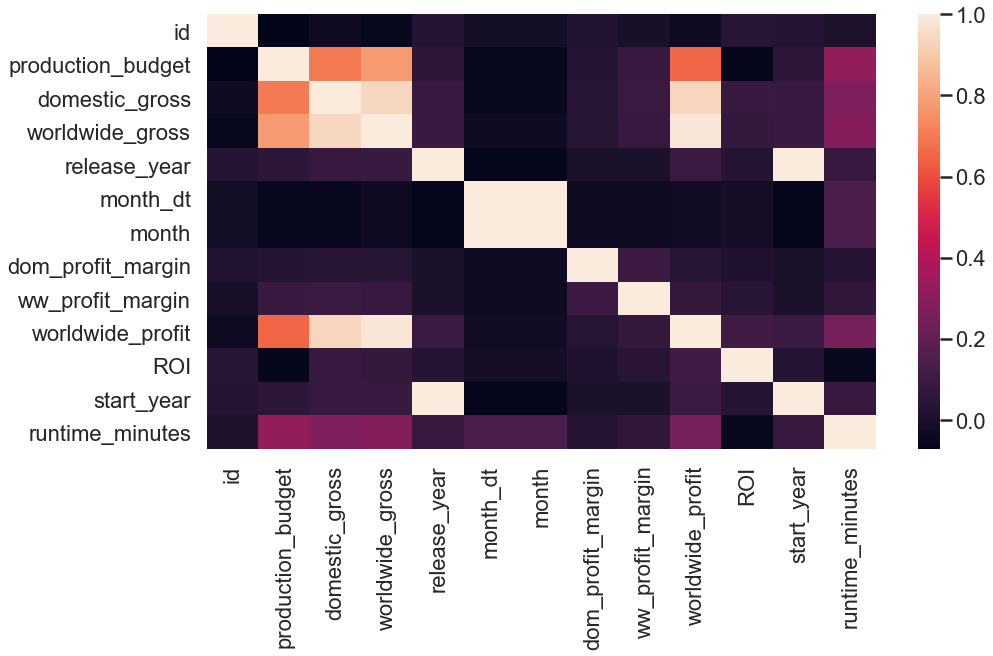

In [36]:
plt.figure(figsize = (15,8))
corr = budget_and_tbasics.corr()
sns.heatmap(corr)
corr


From the heatmap, there is little or no correlation between production budget and ROI. This means that high production budgets does not necessarily guarantee higher returns on the movies.However, the same cannot be said for domestic and worlwide gross
because of the difference in calculations of the movie gross and ROI.

## Conclusions

The following conclusions can be made from the analysis of the movie:

- Produce movies with runtimes of  90 - 120 minutes.
- Movie release dates should be kept within the months of May, June, July and November.
- Microsoft could consider acquiring either of the top grossing studios: BH Tilt,Neon or Orchard film studios.
- It would be ideal if Microsoft produced movies of the most common genres,i.e,documentaries, drama and comedy.
